In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import scipy.io
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

In [2]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=True)

font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 11}

mpl.rc('font', **font)

jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=1.5)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

$$ \tau\frac{du}{dt} = -u + \theta(W_{uI}I - W_{uv}v + \eta_u) $$
$$ \tau\frac{dv}{dt} = -v + \theta(W_{vI}I - W_{vu}v + \eta_v) $$
$$ \tau\frac{dy}{dt} = -y + W_{yu}u - W_{yv}v + \eta_y $$

In [3]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 1,
              'tau': 100,
              'th': 0.7,
              'sigma': 0.01,}

In [4]:
def sigmoid(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

In [5]:
def network(state_init, t, I, params):
    # Unpack parameters of the simulation
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    th = params['th'] #The target (threshold) value of y
    sigma = params['sigma']
    
    u, v, y = state_init

    dudt = (-u + sigmoid(Wut * I - Wuv * v )) / tau *dt
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u )) / tau *dt
    dydt = (-y + u - v) / tau * dt

    return [dudt, dvdt, dydt]

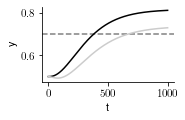

In [36]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,1, figsize=(2.7,1.8))
ax.axhline(0.7, linestyle='--', color='gray')

I1=0.65
I2= 0.75

s1 = odeint(network, state_init, t, args=(I1, PARAMS_DICT))
s2 = odeint(network, state_init, t, args=(I2, PARAMS_DICT))

ax.plot(t, s1[:,2],  color='k', label = str(I1))
ax.plot(t, s2[:,2],  color='#cccccc', label = str(I2))
#ax.legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('t', fontdict=font)
ax.set_ylabel('y', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsexp.svg', dpi=500, bbox_inches='tight')

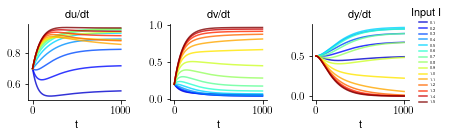

In [15]:
state_init = [0.7, 0.2, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(6.4,2.2))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.1,1.6,0.1):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsI.svg', dpi=500, bbox_inches='tight')

# low, intermediate and high regimes of I

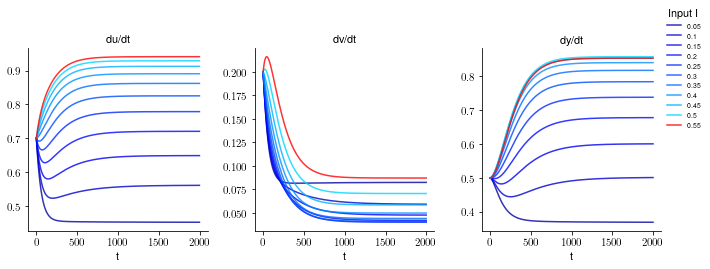

In [66]:
#low regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.05,0.55,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)
    
s1 = odeint(network, state_init, t, args=(0.55, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(0.55))

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

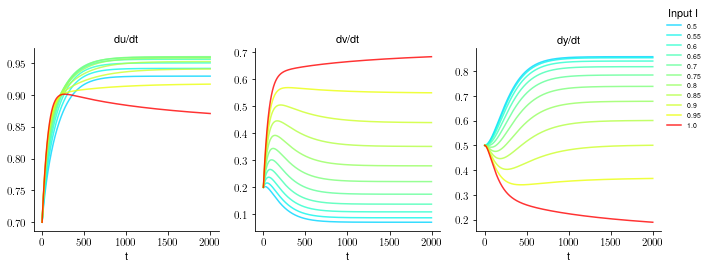

In [55]:
#imtermediate regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.5,1.0,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)
    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

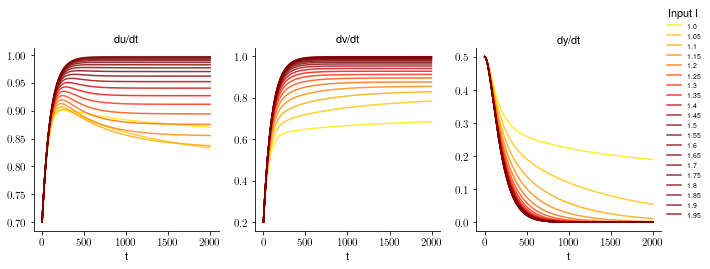

In [54]:
#high regime

state_init = [0.7, 0.2, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(1.0,2,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

## changing parameter

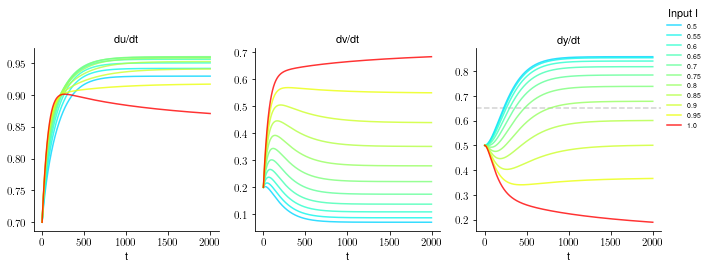

In [65]:
#imtermediate regime

state_init = [0.7, 0.2, 0.5] #u, v, y
PARAMS_DICT['tau'] = 100
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.65, linestyle='--', color='lightgray')

for i in np.arange(0.5,1.0,0.05):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i.round(2)))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)
    
s1 = odeint(network, state_init, t, args=(1.0, PARAMS_DICT))
ax[0].plot(t, s1[:,0], color='r', alpha=0.8)
ax[1].plot(t, s1[:,1],  color='r', alpha=0.8)
ax[2].plot(t, s1[:,2],  color='r', alpha=0.8, label = str(1.0))

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
    
plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

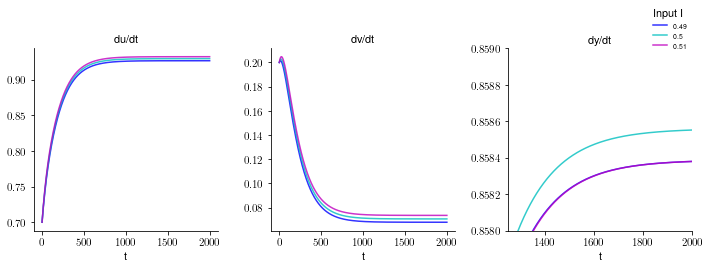

In [79]:
#imtermediate regime

state_init = [0.7, 0.2, 0.8] #u, v, y
PARAMS_DICT['tau'] = 100
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(10,4)) #(6.4,2.2)
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
ax[2].axhline(0.65, linestyle='--', color='lightgray')

for j,i in enumerate([0.49,0.5,0.51]):
    c = ['b','c','m'][j]
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c, alpha=0.8)
    ax[1].plot(t, s1[:,1],  color=c, alpha=0.8)
    ax[2].plot(t, s1[:,2],  color=c, alpha=0.8, label = str(i))


for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 7}) #4
ax[2].set_ylim(0.858,0.859)
ax[2].set_xlim(1250,2000)

plt.tight_layout()
#plt.savefig('../report/figures/dynamicsregimes.svg', dpi=500, bbox_inches='tight')

# Experiment

In [80]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

%load_ext autoreload
%autoreload 2

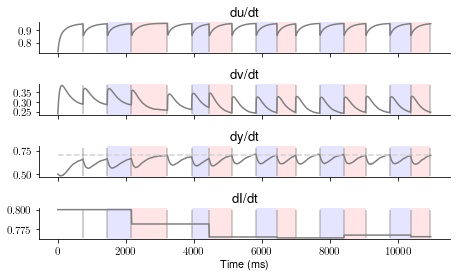

In [117]:
params = Params(ntrials=5, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
alpha=1
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()
plt.savefig('../report/figures/trial.svg', dpi=500, bbox_inches='tight')

In [118]:
stimulus_lst

array([700, 500, 600, 700, 600])

In [123]:
exp_result.production

[104, 65, 53, 62, 57]